In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

pd.set_option("display.max_rows", 5)
pd.set_option('display.max_columns',100)

In [2]:
df_form1 = pd.read_excel('dataset/formulario1.xlsx')
df_form1['bad_smell'] = df_form1['bad_smell'].str.lower().replace({"long method": "Long Method",
                           "métodos longos": "Long Method",
                           "método grande": "Long Method",
                           "longo método": "Long Method",
                           "método longo": "Long Method",
                           "método longo": "Long Method",
                           "método longo, muitos comentários":"Long Method",
                           "duplicade code":"Duplicade Code",
                           "código duplicado":"Duplicade Code",
                           "duplicated code":"Duplicade Code",
                           "codigo duplicado":"Duplicade Code",
                           "código duplicado,":"Duplicade Code",
                           "código duplicado + outro":"Duplicade Code",
                           "complexidade ciclomática": "Complexidade Ciclomática",
                           "método longo com grande complexidade ciclomatica":"Complexidade Ciclomática",
                           "método longo com grande complexidade ciclomatica, método invejoso":"Complexidade Ciclomática",
                           "grande complexidade ciclomática":"Complexidade Ciclomática",
                           "relativa complexidade ciclomática":"Complexidade Ciclomática",
                           "classe grande, muitos comentários": "Long Class",
                           "classe grande":"Long Class",
                           "classe longa":"Long Class",
                           "long class":"Long Class",
                           "god class":"God Class",
                           "god method":"God Method",
                           "longa lista de parâmetros":"Long Parameter List",
                           "métodos com muitos parâmetros":"Long Parameter List",
                           "método com muitos parâmetros":"Long Parameter List",
                           "long parameter list":"Long Parameter List",
                           "longa lista de parametros":"Long Parameter List",
                           "muitos parâmetros":"Long Parameter List",
                           "classe de dados":"Data Class",
                           "switch":"Switch",
                           "switch case":"Switch",
                           "uso indevido de switch":"Switch",
                           "switch statement":"Switch",
                           "método invejoso":"Envy",
                           "envy class":"Envy",
                           "sem valor": "No Value",
                           "nome do método pode ser melhor": "No Value",
                           "não utilização de padrão de nomenclatura": "No Value",
                           "se algo no cliente for alterado + precisará alterar em diversos arquivos + códigos semelhantes.": "No Value"})
display(df_form1['bad_smell'].unique())


df_form1['classe'] = df_form1['classe'].replace({
    "AGENCIA":"Agencia",
    "Agência":"Agencia",
    "agencia":"Agencia",
    "EMPRESA":"Empresa",
    "carteira":"Carteira"
})
display(df_form1['classe'].unique())
display(df_form1)

array(['Long Method', 'Duplicade Code', 'Complexidade Ciclomática',
       'Long Class', 'No Value', 'God Class', 'God Method',
       'Long Parameter List', 'Data Class', 'Switch', 'Envy'],
      dtype=object)

array(['Agencia', 'Carteira', 'Empresa', 'Climas', 'Estacao', 'Cliente',
       'Destino', 'sem valor'], dtype=object)

,nome,matricula,horario_inicio,horario_fim,classe,metodo,bad_smell,descricao,sugestao,refatoracao,nivel_dificuldade_encontrar,certeza_do_bad_smell
0,Thiago Abreu Lopes,469845,15:54:00,15:59:00,Agencia,AgendaViagem,Long Method,Método com muitas linhas de código,Fracionar esse único módulo em módulos menores\n,"Sim, a longo prazo pode vir a ser um problema ...",Fácil,Muita Certeza
...,...,...,...,...,...,...,...,...,...,...,...,...
285,Vinicius Tabosa dos Santos,472107,16:14:00,16:19:00,Agencia,agendaViagem2,Duplicade Code,Sem valor,Criar uma classe com seus próprios métodos que...,"Sim, o método é logo e não faz sentido ficar n...",Fácil,Intermediário


In [3]:
df_form2 = pd.read_excel('dataset/feedback.xlsx')
df_form2['3_Entendimento_Bad_Smells'].replace({'Baixo\n':'Baixo'},inplace=True)
df_form2

,Nome,Matricula,Horario_Inicio,1_Entendimento_Java,2_Entendimento_OO,3_Entendimento_Bad_Smells,4_BadSmells_Prejudiciais,5_Atributos_Qualidade,¨6_Atributos_Mais_Importantes,7_Complexidade_Ciclomatica,8_Codigo_Duplicado,9_Classe_Grande,10_Metodo_Grande,11_Muitos_Paramentos,12_Metodo_invejoso,13_refatoracao,14_cite_atributos,Horario_Fim
0,Thiago Abreu Lopes,469845,16:50:00,Intermediário,Intermediário,Bom,"Métodos Longos, Métodos com muitos parâmetros,...",Intermediário,"Inteligibilidade,Modularização",5,4,4,5,4,4,5,Grau de Acoplamento e Grau de Coesão do código...,16:55:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,Vinicius Tabosa dos Santos,472107,16:59:00,Intermediário,Baixo,Intermediário,"Métodos Longos, Classe Invejosa, Shotgun Surgery",Intermediário,Modularização,5,4,4,5,3,3,4,sem valor,17:02:00


In [4]:
df_form2['4_BadSmells_Prejudiciais'] = df_form2['4_BadSmells_Prejudiciais'].fillna("No Value")
text_list = list(df_form2['4_BadSmells_Prejudiciais'])
all_bad_smells = []
for text in text_list:
    all_bad_smells.extend(text.split(','))
bad_smells = pd.DataFrame(all_bad_smells,columns=['bad smell'])
bad_smells['bad smell'].replace({
    " Métodos com muitos parâmetros":"Métodos com muitos parâmetros",
    "  Shotgun Surgery ":"Shotgun Surgery",
    " Shotgun Surgery ":"Shotgun Surgery",
    " Métodos Longos": "Métodos Longos",
    " Classes Grandes":"Classes Grandes",
    " Classe Invejosa":"Classe Invejosa",
    " Método Invejoso":"Método Invejoso"
},inplace=True)
display(bad_smells['bad smell'].unique())

df_form2['¨6_Atributos_Mais_Importantes'] = df_form2['¨6_Atributos_Mais_Importantes'].fillna("No Value")
text_list = list(df_form2['¨6_Atributos_Mais_Importantes'])
all_atributos = []
for text in text_list:
    all_atributos.extend(text.split(','))
atributos = pd.DataFrame(all_atributos,columns=['atributos'])
atributos['atributos'].replace({
    " Modularização": "Modularização",
    " Continuidade":"Continuidade",
    " Testabilidade": "Testabilidade",
    " Estruturação do código":"Estruturação do código"
},inplace=True)
display(atributos['atributos'].unique())

array(['Métodos Longos', 'Métodos com muitos parâmetros',
       'Shotgun Surgery', 'No Value', 'Código duplicado',
       'Classes Grandes', 'Classe Invejosa', 'Método Invejoso'],
      dtype=object)

array(['Inteligibilidade', 'Modularização', 'No Value', 'Continuidade',
       'Estruturação do código', 'Testabilidade'], dtype=object)

In [13]:
data = df_form2['1_Entendimento_Java'].value_counts().reset_index()

([<matplotlib.patches.Wedge at 0x1bc9e2487f0>,
 [Text(0.1231609675744343, 1.0930834259406412, 'Intermediário'),
  Text(-0.685838828056252, -0.8600145940217684, 'Baixo'),
  Text(0.8600146261281997, -0.685838787796063, 'Bom'),
  Text(1.0930834331476156, -0.12316090361077374, 'Ótimo')])

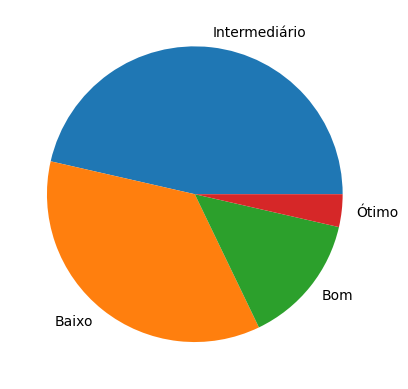

In [14]:
plt.pie(data['1_Entendimento_Java'],labels=data['index'])